In [2]:
import pyxdf
import mne
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data,header = pyxdf.load_xdf('.\data\sub-P001_ses-S001_task-Default_run-001_eeg.xdf')
(header,data)

({'info': defaultdict(list,
              {'version': ['1.0'], 'datetime': ['2021-07-13T16:19:06+0200']})},
 [{'info': defaultdict(list,
               {'name': ['LiveAmpSN-056309-0533-DeviceTrigger'],
                'type': ['Markers'],
                'channel_count': ['1'],
                'channel_format': ['string'],
                'source_id': ['LiveAmpSN-056309-0533_DeviceTrigger'],
                'nominal_srate': ['0.000000000000000'],
                'version': ['1.100000000000000'],
                'created_at': ['6299.236841800000'],
                'uid': ['e97b5c89-883f-41ca-b128-a59187711b51'],
                'session_id': ['default'],
                'hostname': ['NTNU08233'],
                'v4address': [None],
                'v4data_port': ['16574'],
                'v4service_port': ['16574'],
                'v6address': [None],
                'v6data_port': ['16574'],
                'v6service_port': ['16574'],
                'desc': [None],
               

In [4]:
data[2]['time_series'].T.shape

(36, 351504)

In [5]:
start_time = data[2]['time_stamps'][0]
end_time = data[2]['time_stamps'][-1]
(start_time,end_time)

(6466.230998443371, 7169.228981385177)

In [6]:
i,j=0,len(data[1]['time_stamps'])-1
while data[1]['time_stamps'][i]<start_time: i+=1
while data[1]['time_stamps'][j]>end_time: j-=1
data[1]['time_series'][i:j].shape

(41428, 6)

In [7]:
eeg_labels=['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'T7', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'P9', 'O1', 
                        'Oz', 'O2', 'P10', 'P8', 'P4', 'CP2', 'CP6', 'T8', 'C4', 'Cz', 'FC2', 'FC6', 'F10', 'F8', 'F4']
eeg_labels

['Fp1',
 'Fz',
 'F3',
 'F7',
 'F9',
 'FC5',
 'FC1',
 'C3',
 'T7',
 'CP5',
 'CP1',
 'Pz',
 'P3',
 'P7',
 'P9',
 'O1',
 'Oz',
 'O2',
 'P10',
 'P8',
 'P4',
 'CP2',
 'CP6',
 'T8',
 'C4',
 'Cz',
 'FC2',
 'FC6',
 'F10',
 'F8',
 'F4']

In [8]:
info=mne.create_info(
        ch_names=eeg_labels,
        sfreq=data[2]['info']['effective_srate'],
        ch_types='eeg',
        verbose=None)
raw_data = mne.io.RawArray(data=data[2]['time_series'].T[:-5],
                       info=info)
raw_data.get_data()

Creating RawArray with float64 data, n_channels=31, n_times=351504
    Range : 0 ... 351503 =      0.000 ...   702.998 secs
Ready.


array([[  3215.57617188,   3086.71069336,   2748.82006836, ...,
         -6866.57714844,  -6793.70117188,  -6890.78808594],
       [ 22226.68554688,  22582.35742188,  23677.81640625, ...,
          8598.75488281,   8304.07714844,   8453.36914062],
       [  6560.34375   ,   6540.20214844,   6200.1953125 , ...,
        -39103.02734375, -39038.53515625, -39139.6484375 ],
       ...,
       [  -873.046875  ,   -513.38708496,   -648.07128906, ...,
          3199.58496094,   3150.83837891,   2975.09765625],
       [-13463.25683594, -13481.32324219, -13762.08496094, ...,
        -35530.35546875, -35456.21875   , -35552.24609375],
       [-35486.24609375, -35594.1171875 , -35863.484375  , ...,
        -46565.59375   , -46497.48046875, -46583.29296875]])

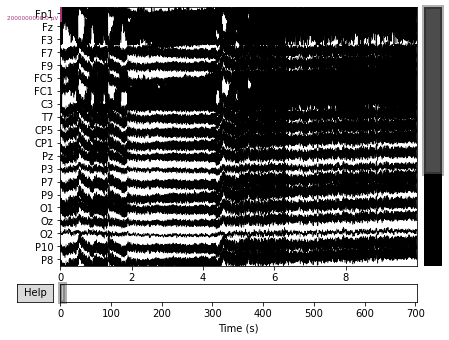

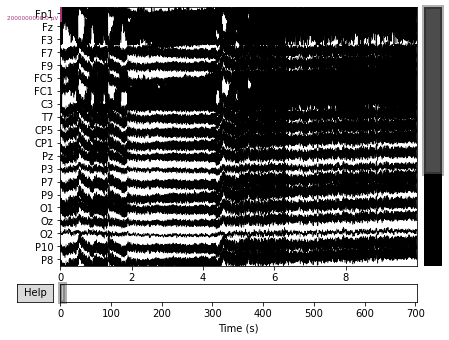

In [9]:
plt.rcParams["figure.figsize"] = (20,4)
raw_data.plot(scalings={'eeg':1e3},
             show=True,
             title='Raw_data')

Marker "1" @ 6476.47s
Marker "0" @ 6476.67s
Marker "1" @ 6605.46s
Marker "0" @ 6605.60s
Marker "1" @ 6610.09s
Marker "0" @ 6610.30s
Marker "1" @ 6730.73s
Marker "0" @ 6730.93s
Marker "1" @ 6742.02s
Marker "0" @ 6742.18s
Marker "1" @ 6862.90s
Marker "0" @ 6863.17s
Marker "1" @ 6874.90s
Marker "0" @ 6875.06s
Marker "1" @ 6997.76s
Marker "0" @ 6997.94s
Marker "1" @ 7008.10s
Marker "0" @ 7008.25s
Marker "1" @ 7064.02s
Marker "0" @ 7064.26s
Marker "1" @ 7067.66s
Marker "0" @ 7067.82s
Marker "1" @ 7126.44s
Marker "0" @ 7126.68s
Marker "1" @ 7131.99s
Marker "0" @ 7132.21s
Marker "1" @ 7164.28s
Marker "0" @ 7164.43s


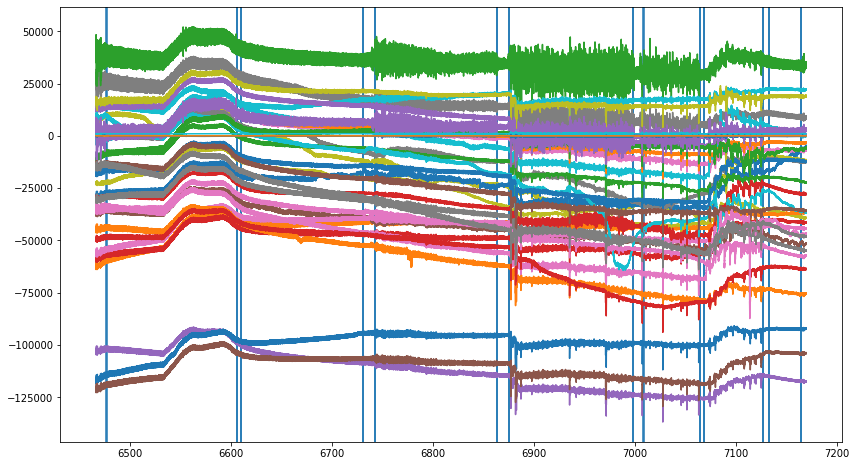

In [10]:
plt.figure(figsize=(14,8))
for stream in data:
    y = stream['time_series']
    
    if isinstance(y, list):
        # list of strings, draw one vertical line for each marker
        for timestamp, marker in zip(stream['time_stamps'], y):
            plt.axvline(x=timestamp)
            print(f'Marker "{marker[0]}" @ {timestamp:.2f}s')
    elif isinstance(y, np.ndarray):
        # numeric data, draw as lines
        plt.plot(stream['time_stamps'], y)
    else:
        raise RuntimeError('Unknown stream format')
plt.show()

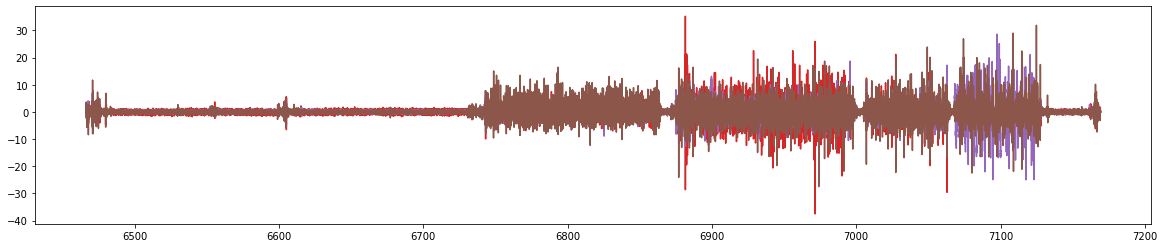

In [11]:
plt.plot(data[1]['time_stamps'], data[1]['time_series'])

In [12]:
data[2]['time_series'][:,32:35].shape

(351504, 3)

# XDF contents


### #0: info/type = markers
This indicates a when a button was pressed to signify the start of a new activity. 1 is button press, 0 is buttn release. At release the nextactivity is performed.



### #1: info/type = hmd-acceleration
This is the acceleration time series, that includes linear acceleration in x y and z axis. In addition, we are getting angular acceleration. It comes with the format of [lin_x, lin_y, lin_z, ang_x, ang_y, ang_z].


### #2: info/type = EEG
This is the EEG time series. This includes 36 channels witht the following labels:[Fp1, Fz, F3, F7, F9, FC5, FC1, C3, T7, CP5, CP1, Pz, P3, P7, P9, O1, Oz, O2, P10, P8, P4, CP2, CP6, T8, C4, Cz, FC2, FC6, F10, F8, F4, Fp2, ACC_X, ACC_Y, ACC_Z, DeviceTrigger]
Cz is a reference electrode that looks for noise. I need to re-reference it. Cz has index 25.

In [18]:
data[0]['time_stamps'].shape

(28,)

## Setting EEG reference

In [ ]:
eeg_referenced = mne.set_eeg_reference(
    inst=raw_data, 
    ref_channels=['Cz'],
    copy=True,
    projection = False,
    ch_type='eeg')
eeg_referenced

In [ ]:
def plot_data(data):
    '''
    ax[0] - linear hmd acceleration
    ax[1] - angular hmd acceleration
    ax[2] - EEG accelerometer
    ax[3] - EEG data
    '''
    fig, axs = plt.subplots(4,1,sharex=True, figsize=(36,16),gridspec_kw={'height_ratios':[1,1,1,6]})
    lin_acc, ang_acc, eeg_acc, eeg = None,None,None,None
    for stream in data:
        if stream['info']['type'] == ['Markers']:  # Adds lines for button presses/releases
            for ax in axs: 
                for timestamp in stream['time_stamps']:
                    ax.axvline(x=timestamp,color='lightgray')

        elif stream['info']['type'] == ['hmd-acceleration']:  # Fill acceleration plots for linear acceleration and angular acceleration
            lin_acc = stream['time_series'][:,:3]
            ang_acc = stream['time_series'][:,3:]

            axs[0].set_title('linear acceleration')
            axs[0].plot(stream['time_stamps'],lin_acc[:,0], label='x')
            axs[0].plot(stream['time_stamps'],lin_acc[:,1], label='y')
            axs[0].plot(stream['time_stamps'],lin_acc[:,2], label='z')
            axs[0].legend(loc='upper left')

            axs[1].set_title('Angular acceleration')
            axs[1].plot(stream['time_stamps'],ang_acc[:,0], label='x')
            axs[1].plot(stream['time_stamps'],ang_acc[:,1], label='y')
            axs[1].plot(stream['time_stamps'],ang_acc[:,2], label='z')
            axs[1].legend(loc='upper left')

        elif stream['info']['type'] == ['EEG']:  # Fill the EEG plots for EEG recorded acceleration and the EEG time series
            eeg_acc = stream['time_series'][:,32:35]
            eeg = stream['time_series'][:,:32]
            

            axs[2].set_title('EEG measured acceleration')
            axs[2].plot(stream['time_stamps'],eeg_acc[:,0],label='x')
            axs[2].plot(stream['time_stamps'],eeg_acc[:,1],label='y')
            axs[2].plot(stream['time_stamps'],eeg_acc[:,2],label='z')
            axs[2].legend(loc='upper left')

            axs[3].set_title('EEG time series')
            for i,label in enumerate(eeg_labels):
                axs[3].plot(stream['time_stamps'],eeg[:,i],label=label)
            axs[3].legend(loc='lower center',ncol=len(eeg_labels))
    return lin_acc, ang_acc, eeg_acc, eeg

#hmd_lin_acc, hmd_ang_acc, eeg_acc, eeg = plot_data(data)

In [ ]:
plt.rcParams["figure.figsize"] = (20,4)
eeg_referenced[0].plot(scalings={'eeg':1e3},
                      show=True)

## Splitting the data into multiple epochs


In [ ]:
first_eeg_time = data[2]['time_stamps'][0]
last_eeg_time = data[2]['time_stamps'][-1]
first_acc_time = data[1]['time_stamps'][0]
last_acc_time = data[1]['time_stamps'][-1]

# selecting the last time to start and the first time to end
first_time = abs(first_eeg_time-first_acc_time)
last_time = (last_eeg_time if last_eeg_time<last_acc_time else last_acc_time) - first_time

(first_time, last_time, first_eeg_time,last_eeg_time,first_acc_time,last_acc_time)

In [ ]:
events = mne.make_fixed_length_events(raw=eeg_referenced[0],
                                     start=first_time,
                                     stop=last_time,
                                     duration=1.,
                                     overlap=0.5)
eeg_epochs = mne.Epochs(raw=eeg_referenced[0],
                       events=events,
                       event_id=None,
                       tmin=-0.5,
                       tmax=0.5,
                       baseline=(0, 0))
eeg_epochs.plot()

In [ ]:
sample_rate = data[2]['info']['effective_srate']
#eeg=eeg.astype('float')
#eeg

In [ ]:
iir_params=mne.filter.construct_iir_filter(iir_params ={'order': 2,
                                                        'ftype':'butter',
                                                        'output':'sos'
                                                       },
                                         f_pass = [10,60],
                                         sfreq = sample_rate,
                                         btype = 'bandpass',
                                         return_copy = True)
#eeg_buttered = mne.filter.filter_data(data=eeg_referenced[0].get_data(), 
#                                     sfreq = sample_rate,
#                                     l_freq = 0.1,
#                                     h_freq = 60,
#                                     method = 'iir',
#                                     iir_params = iir_params)

In [ ]:
eeg_referenced[0].filter(l_freq = 0.1,
                        h_freq = 60,
                        picks='eeg',
                        fir_window='hamming')
plt.rcParams["figure.figsize"] = (20,4)
eeg_referenced[0].plot(scalings={'eeg':5e3},
                      show=True)

In [ ]:
eeg_referenced[0].notch_filter(freqs=50.,
                              picks='eeg',
                              fir_window='hamming')
plt.rcParams["figure.figsize"] = (20,4)
eeg_referenced[0].plot(scalings={'eeg':1e3},
                      show=True)

In [ ]:
#fig,ax = plt.subplots(1,1, figsize=(46,16))
#ax.set_title('Buttered EEG time series')
#for i,label in enumerate(eeg_labels):
#    ax.plot(stream['time_stamps'],eeg_buttered[:,i],label=label)
#ax.legend(loc='lower center',ncol=len(eeg_labels))
#plt.show()

In [ ]:
#eeg_notched = mne.filter.notch_filter(x = eeg_buttered,
#                                     Fs = sample_rate, 
#                                     freqs = 50,
#                                     method = 'iir',
#                                     iir_params = iir_params)

In [ ]:
#fig,ax = plt.subplots(1,1, figsize=(46,16))
#ax.set_title('Buttered and notched EEG time series')
#for i,label in enumerate(eeg_labels):
#    ax.plot(stream['time_stamps'],eeg_notched[:,i],label=label)
#ax.legend(loc='lower center',ncol=len(eeg_labels))
#plt.show()